In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as iplot
import wordcloud

In [5]:
fifa_df = pd.read_csv('FIFA_data.csv', index_col=0) # index_col=0 doesn't add unnamed_col column while reading from CSV
fifa_df

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,https://cdn.sofifa.org/teams/2/light/703.png,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,https://cdn.sofifa.org/teams/2/light/1944.png,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,https://cdn.sofifa.org/teams/2/light/15048.png,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [6]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

In [7]:
fifa_df.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [8]:
fifa_df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [9]:
fifa_df.shape

(18207, 88)

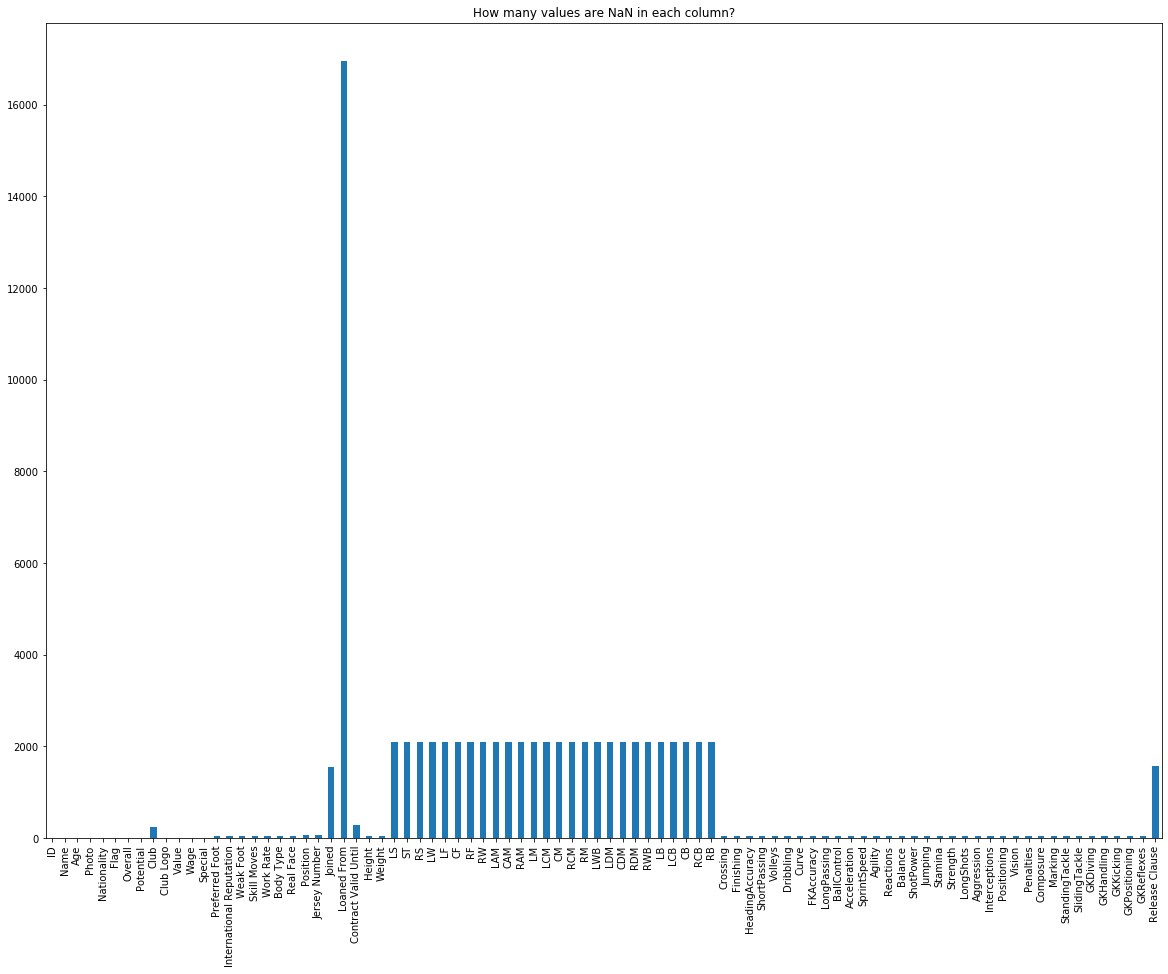

In [36]:
num_of_nulls = fifa_df.isnull().sum()
num_of_nulls.plot.bar(figsize=(20,15), title="How many values are NaN in each column?")

In [44]:
fifa_df.dtypes.to_frame() # converts a series output to a dataframe

,0
ID,int64
Name,object
Age,int64
Photo,object
Nationality,object
...,...
GKHandling,float64
GKKicking,float64
GKPositioning,float64
GKReflexes,float64


In [45]:
# Check which columns are correlated to each other and by how much.
corr = fifa_df.corr() # All numerical columns will be selected for correlation calculations.
corr

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
ID,1.000000,-0.739208,-0.417025,0.047074,-0.231352,-0.356191,-0.075784,-0.056914,0.182074,-0.131994,...,-0.140657,-0.384473,-0.110198,-0.085929,-0.068409,-0.105594,-0.111149,-0.106652,-0.118250,-0.105778
Age,-0.739208,1.000000,0.452350,-0.253312,0.236695,0.253765,0.059867,0.027649,-0.241156,0.130545,...,0.139535,0.391023,0.142817,0.119745,0.103089,0.101277,0.106419,0.104964,0.116402,0.103313
Overall,-0.417025,0.452350,1.000000,0.660939,0.606960,0.499491,0.212015,0.414463,-0.218931,0.394972,...,0.341429,0.727655,0.286505,0.252629,0.222811,-0.025937,-0.025062,-0.029372,-0.017674,-0.023276
Potential,0.047074,-0.253312,0.660939,1.000000,0.383727,0.372993,0.162346,0.354290,-0.010474,0.246319,...,0.224281,0.440008,0.162801,0.143564,0.128980,-0.053446,-0.054672,-0.059061,-0.052589,-0.053341
Special,-0.231352,0.236695,0.606960,0.383727,1.000000,0.292208,0.341855,0.763412,-0.133716,0.866417,...,0.734533,0.752331,0.561866,0.538802,0.506968,-0.674637,-0.673625,-0.670254,-0.668272,-0.673238
International Reputation,-0.356191,0.253765,0.499491,0.372993,0.292208,1.000000,0.128317,0.208153,-0.077298,0.191770,...,0.218620,0.392787,0.115208,0.092846,0.079176,0.004526,0.003942,0.000651,0.006904,0.003444
Weak Foot,-0.075784,0.059867,0.212015,0.162346,0.341855,0.128317,1.000000,0.340721,-0.035410,0.307925,...,0.330252,0.278132,0.065673,0.042646,0.026105,-0.231905,-0.233098,-0.229395,-0.231298,-0.232574
Skill Moves,-0.056914,0.027649,0.414463,0.354290,0.763412,0.208153,0.340721,1.000000,-0.035194,0.741035,...,0.690434,0.586836,0.241428,0.210517,0.178607,-0.621675,-0.619755,-0.616990,-0.618853,-0.621925
Jersey Number,0.182074,-0.241156,-0.218931,-0.010474,-0.133716,-0.077298,-0.035410,-0.035194,1.000000,-0.076585,...,-0.028023,-0.167523,-0.142474,-0.133285,-0.124610,0.004807,0.001543,0.001162,-0.002736,0.003255
Crossing,-0.131994,0.130545,0.394972,0.246319,0.866417,0.191770,0.307925,0.741035,-0.076585,1.000000,...,0.645805,0.575446,0.443101,0.428963,0.409961,-0.663053,-0.660193,-0.659767,-0.660160,-0.662539


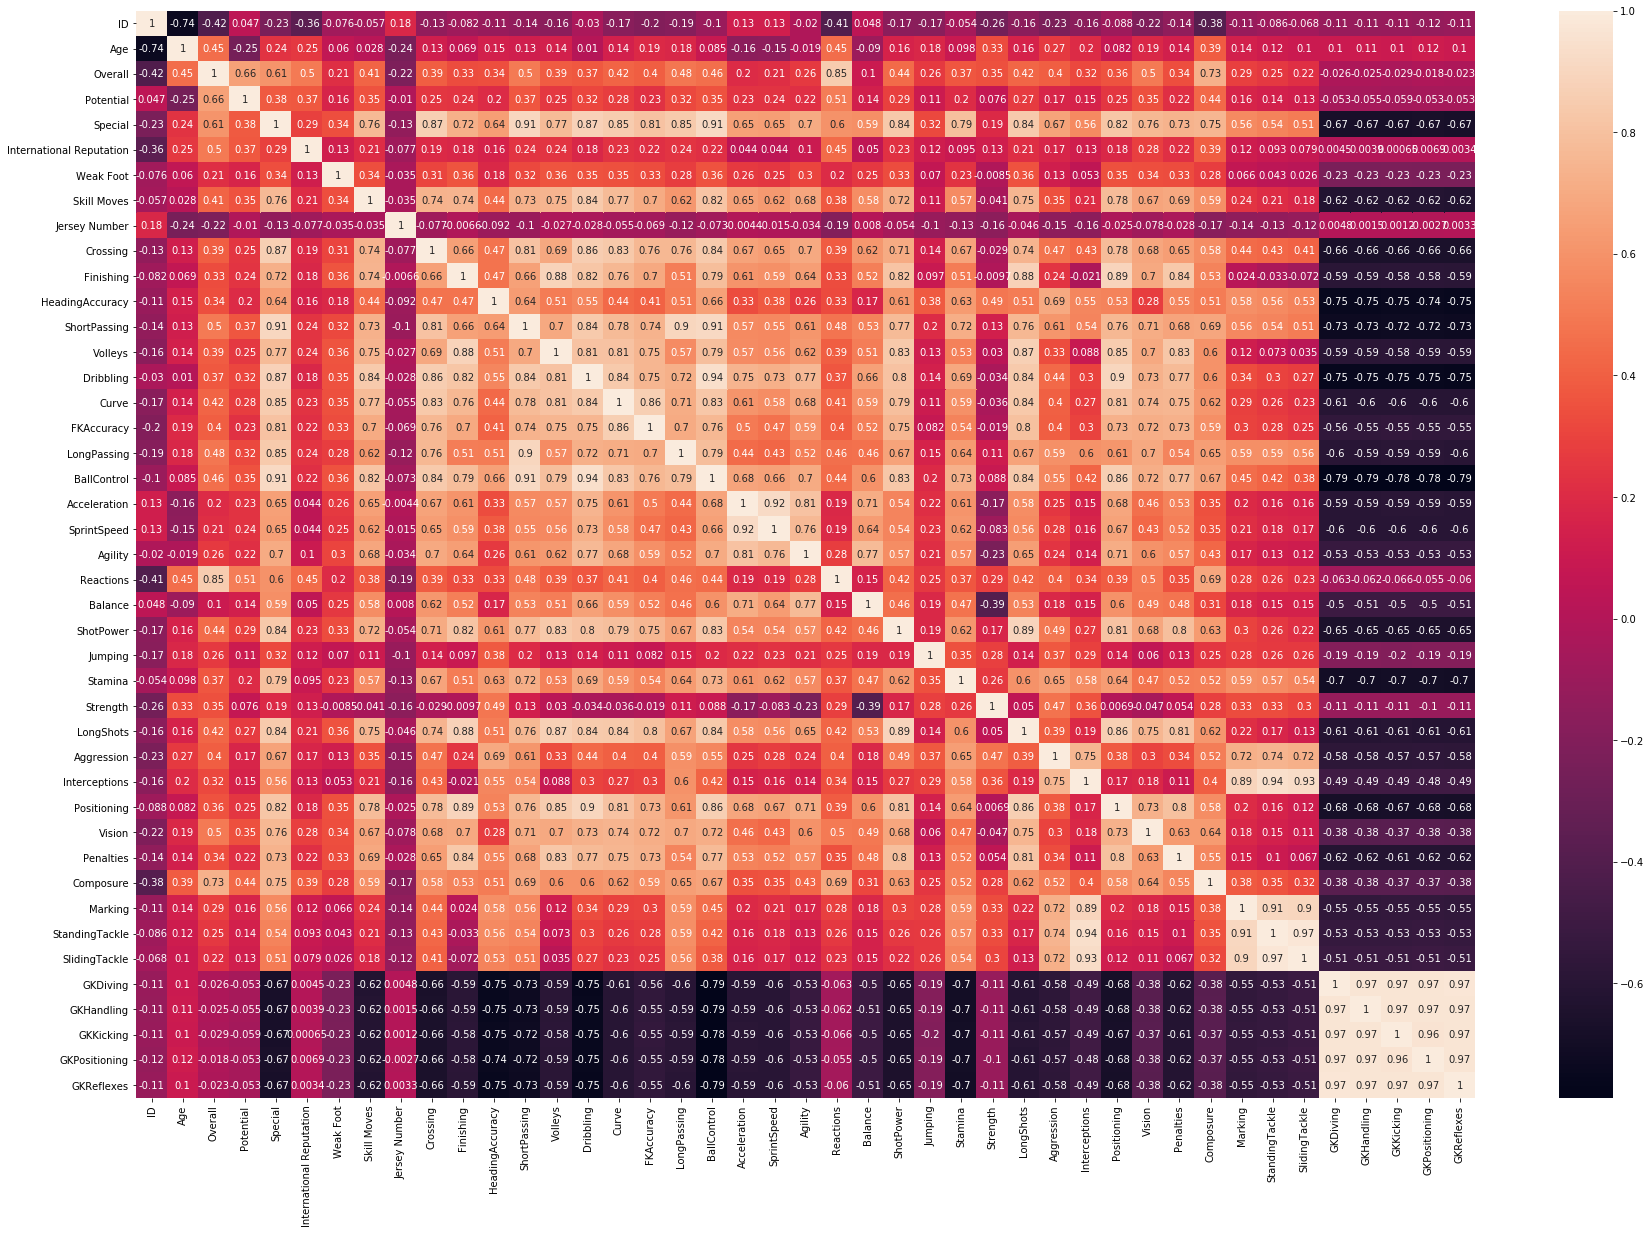

In [51]:
plt.figure(figsize=(30,20))
sns.heatmap(corr, annot=True)

In [52]:
fifa_df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [89]:
fifa_df.Club.unique()

array(['FC Barcelona', 'Juventus', 'Paris Saint-Germain',
       'Manchester United', 'Manchester City', 'Chelsea', 'Real Madrid',
       'Atlético Madrid', 'FC Bayern München', 'Tottenham Hotspur',
       'Liverpool', 'Napoli', 'Arsenal', 'Milan', 'Inter', 'Lazio',
       'Borussia Dortmund', 'Vissel Kobe', 'Olympique Lyonnais', 'Roma',
       'Valencia CF', 'Guangzhou Evergrande Taobao FC', 'FC Porto',
       'FC Schalke 04', 'Beşiktaş JK', 'LA Galaxy', 'Sporting CP',
       'Real Betis', 'Olympique de Marseille', 'RC Celta',
       'Bayer 04 Leverkusen', 'Real Sociedad', 'Villarreal CF',
       'Sevilla FC', 'SL Benfica', 'AS Saint-Étienne', 'AS Monaco',
       'Leicester City', 'Atalanta', 'Grêmio', 'Atlético Mineiro',
       'RB Leipzig', 'Ajax', 'Dalian YiFang FC', 'Everton',
       'West Ham United', '1. FC Köln', 'TSG 1899 Hoffenheim',
       'Shanghai SIPG FC', 'OGC Nice', 'Al Nassr',
       'Wolverhampton Wanderers', 'Borussia Mönchengladbach',
       'Hertha BSC', 'SV Werder

In [132]:
fifa_df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [167]:
# How many values are null in each columns?
def check_missing_vals(df):
    for index,val,dtype in zip(df.isna().sum().index, df.isna().sum().values, df.dtypes):
        print((index, val, str(dtype)))
    
check_missing_vals(fifa_df)

('ID', 0, 'int64')
('Name', 0, 'object')
('Age', 0, 'int64')
('Photo', 0, 'object')
('Nationality', 0, 'object')
('Flag', 0, 'object')
('Overall', 0, 'int64')
('Potential', 0, 'int64')
('Club', 0, 'object')
('Club Logo', 0, 'object')
('Value', 0, 'object')
('Wage', 0, 'object')
('Special', 0, 'int64')
('Preferred Foot', 48, 'object')
('International Reputation', 48, 'float64')
('Weak Foot', 48, 'float64')
('Skill Moves', 48, 'float64')
('Work Rate', 48, 'object')
('Body Type', 48, 'object')
('Real Face', 48, 'object')
('Position', 60, 'object')
('Jersey Number', 60, 'float64')
('Joined', 1553, 'object')
('Loaned From', 16943, 'object')
('Contract Valid Until', 289, 'object')
('Height', 48, 'object')
('Weight', 48, 'object')
('LS', 2085, 'object')
('ST', 2085, 'object')
('RS', 2085, 'object')
('LW', 2085, 'object')
('LF', 2085, 'object')
('CF', 2085, 'object')
('RF', 2085, 'object')
('RW', 2085, 'object')
('LAM', 2085, 'object')
('CAM', 2085, 'object')
('RAM', 2085, 'object')
('LM', 208

In [153]:
# Let's impute the missing values in each column
fifa_df['Club'].fillna('No Club', inplace=True)

In [206]:
# All categorical columns replaced by their mode
for col_name in ['Preferred Foot', 'Work Rate', 'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Height', 'Weight']:
    fifa_df[col_name].fillna(fifa_df[col_name].mode()[0], inplace=True)

In [209]:
# Discrete/Continuous numerical cols with their median
for col_name in ['Weak Foot', 'International Reputation', 'Skill Moves']:
    fifa_df[col_name].fillna(fifa_df[col_name].median(), inplace=True)

In [212]:
# Fill these float col types to respective mean values
for col_name in ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration','SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower','Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression','Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure','Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling','GKKicking', 'GKPositioning', 'GKReflexes']:
    fifa_df[col_name].fillna(fifa_df[col_name].mean(), inplace=True)

In [216]:
# Fill these empty col values with 0
for col_name in ['Joined', 'Loaned From','Loaned From', 'Contract Valid Until', 'Release Clause', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW','LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM','CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']:
    fifa_df[col_name].fillna(0, inplace=True)

In [217]:
# Confirm that there are no more missing vals in any column
check_missing_vals(fifa_df)

('ID', 0, 'int64')
('Name', 0, 'object')
('Age', 0, 'int64')
('Photo', 0, 'object')
('Nationality', 0, 'object')
('Flag', 0, 'object')
('Overall', 0, 'int64')
('Potential', 0, 'int64')
('Club', 0, 'object')
('Club Logo', 0, 'object')
('Value', 0, 'object')
('Wage', 0, 'object')
('Special', 0, 'int64')
('Preferred Foot', 0, 'object')
('International Reputation', 0, 'float64')
('Weak Foot', 0, 'float64')
('Skill Moves', 0, 'float64')
('Work Rate', 0, 'object')
('Body Type', 0, 'object')
('Real Face', 0, 'object')
('Position', 0, 'object')
('Jersey Number', 0, 'float64')
('Joined', 0, 'object')
('Loaned From', 0, 'object')
('Contract Valid Until', 0, 'object')
('Height', 0, 'object')
('Weight', 0, 'object')
('LS', 0, 'object')
('ST', 0, 'object')
('RS', 0, 'object')
('LW', 0, 'object')
('LF', 0, 'object')
('CF', 0, 'object')
('RF', 0, 'object')
('RW', 0, 'object')
('LAM', 0, 'object')
('CAM', 0, 'object')
('RAM', 0, 'object')
('LM', 0, 'object')
('LCM', 0, 'object')
('CM', 0, 'object')
('

In [278]:
def defending_score(df):
    return int(round(df[['Marking', 'StandingTackle', 'SlidingTackle']].mean()))
    
def passing_score(df):
    return int(round(df[['Crossing', 'ShortPassing', 'LongPassing']].mean()))
    
def mobility_score(df):
    return int(round(df[['Acceleration', 'SprintSpeed', 'Agility','Reactions']].mean()))
    
def mental_score(df):
    return int(round(df[['Aggression', 'Interceptions', 'Positioning', 'Vision','Composure']].mean()))
    
def power_score(df):
    return int(round(df[['Balance', 'Jumping', 'Stamina', 'Strength']].mean()))
    
def rating_score(df):
    return int(round(df[['Potential', 'Overall']].mean()))
    
def shooting_score(df):  
    return int(round(df[['Finishing', 'Volleys', 'FKAccuracy', 'ShotPower','LongShots', 'Penalties']].mean())) 

def general_score(df):
    return int(round(df[['HeadingAccuracy', 'Dribbling', 'Curve', 'BallControl']].mean()))

In [279]:
fifa_df['Defending'] = fifa_df.apply(defending_score, axis=1)
fifa_df['Passing'] = fifa_df.apply(passing_score, axis=1)
fifa_df['Mobility'] = fifa_df.apply(mobility_score, axis=1)
fifa_df['Mental'] = fifa_df.apply(mental_score, axis=1)
fifa_df['Power'] = fifa_df.apply(power_score, axis=1)
fifa_df['Rating'] = fifa_df.apply(rating_score, axis=1)
fifa_df['Shooting'] = fifa_df.apply(shooting_score, axis=1)
fifa_df['General'] = fifa_df.apply(general_score, axis=1)

In [280]:
fifa_df

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,GKReflexes,Release Clause,Defending,Passing,Mobility,Mental,Power,Rating,Shooting,General
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,8.0,€226.5M,29,87,91,71,74,94,88,89
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,11.0,€127.1M,27,81,91,73,83,94,88,88
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,11.0,€228.1M,28,80,94,72,69,92,84,85
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,94.0,€138.6M,16,39,66,43,54,92,21,26
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,13.0,€196.4M,59,92,81,81,76,92,85,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,...,9.0,€143K,45,43,55,46,54,56,37,39
18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,https://cdn.sofifa.org/teams/2/light/703.png,...,12.0,€113K,19,30,40,37,52,55,39,41
18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,https://cdn.sofifa.org/teams/2/light/1944.png,...,13.0,€165K,19,30,59,36,51,57,42,43
18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,https://cdn.sofifa.org/teams/2/light/15048.png,...,9.0,€143K,24,39,48,38,50,56,45,44


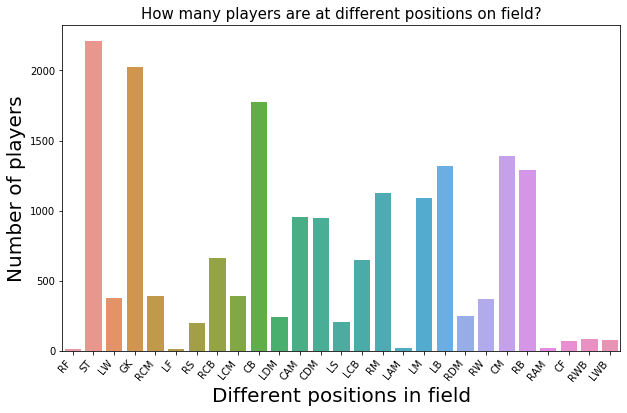

In [299]:
#fifa_df['Position'].value_counts()
ax = sns.countplot(x='Position', data=fifa_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_xlabel("Different positions in field", size=20)
ax.set_ylabel("Number of players", size=20)
ax.set_title("How many players are at different positions on field?", size=15)
fig = plt.gcf()
fig.set_size_inches(10,6)

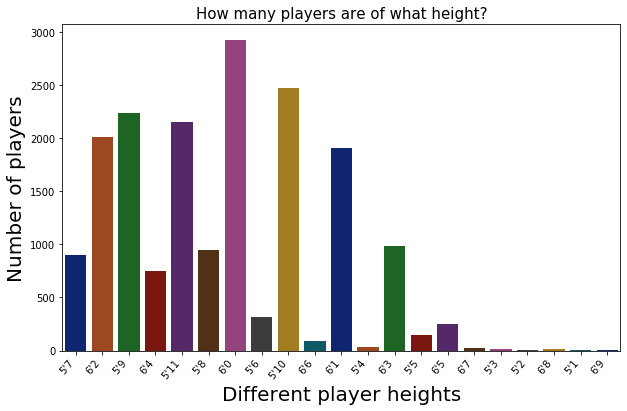

In [302]:
# How many players are of what height?
ax = sns.countplot(x='Height', data=fifa_df, palette='dark')
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_xlabel("Different player heights", size=20)
ax.set_ylabel("Number of players", size=20)
ax.set_title("How many players are of what height?", size=15)
fig = plt.gcf()
fig.set_size_inches(10,6)

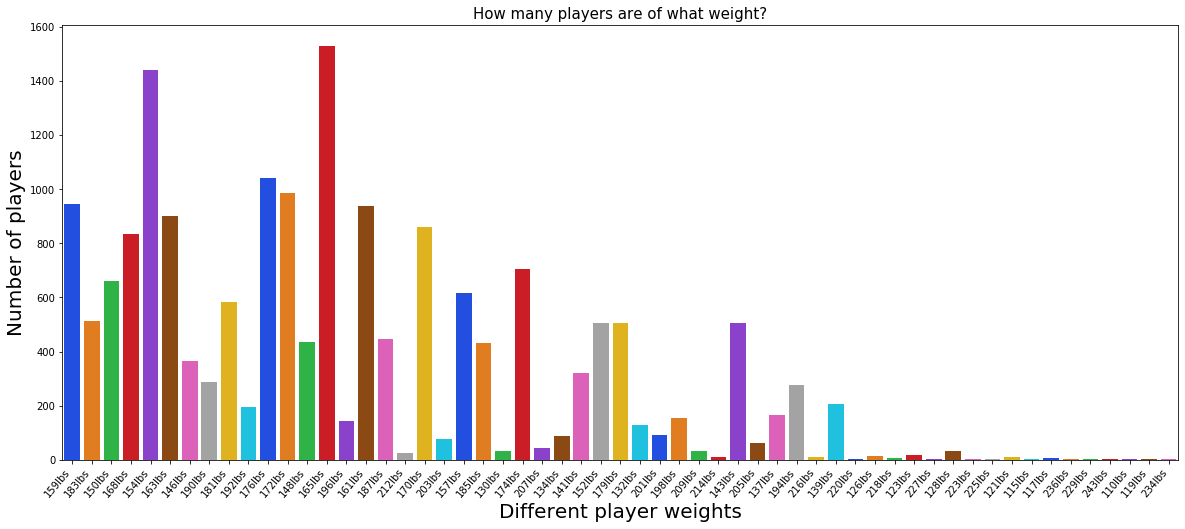

In [323]:
def make_sns_plot_viewable(axes, plot_width=20, plot_height=8, xlabel=None, ylabel=None, title=None):
    ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
    ax.set_xlabel(xlabel, size=20)
    ax.set_ylabel(ylabel, size=20)
    ax.set_title(title, size=15)
    fig = plt.gcf()
    fig.set_size_inches(plot_width, plot_height)


# How many players are of what weight?
ax = sns.countplot(x='Weight', data=fifa_df, palette='bright')
make_sns_plot_viewable(ax, xlabel="Different player weights", ylabel="Number of players", title="How many players are of what weight?")

Text(0.5, 1.0, 'How many players got what speciality score?')

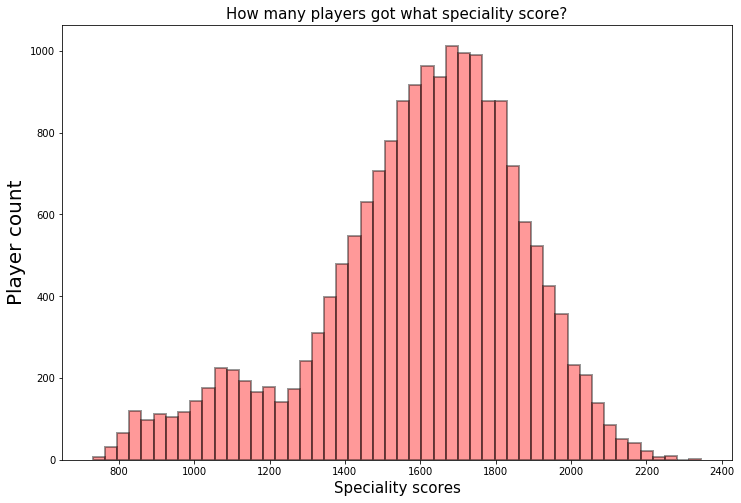

In [338]:
# Speciality score of players(There are 1422 unique speciality scores)
# Its Countplot is not a good idea. Instead lets plot its histogram 
# to check its mean and std
plt.figure(figsize = (12, 8))
# By default edges of histogram bins are turned OFF. Pass edgecolor to turn it back ON.
ax = sns.distplot(fifa_df.Special, kde=False, bins=50, color='red', hist_kws=dict(edgecolor="black", linewidth=2))
ax.set_xlabel("Speciality scores", size=15)
ax.set_ylabel("Player count", size=20)
ax.set_title("How many players got what speciality score?", size=15)

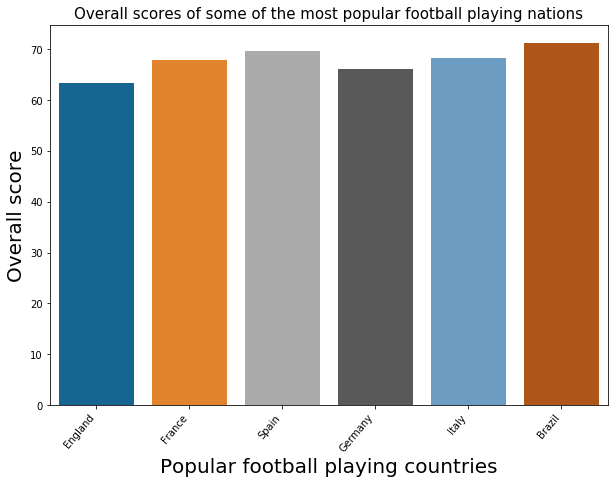

In [359]:
# Plot the overall score of some of the popular football playing countries
countries_overall_score = fifa_df.groupby('Nationality').Overall.mean().to_frame().loc[['England', 'France', 'Spain', 'Germany', 'Italy', 'Brazil']].reset_index()
ax = sns.barplot(x='Nationality', y='Overall', data=countries_overall_score)
make_sns_plot_viewable(ax, 10, 7, xlabel="Popular football playing countries", ylabel="Overall score", title="Overall scores of some of the most popular football playing nations")


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

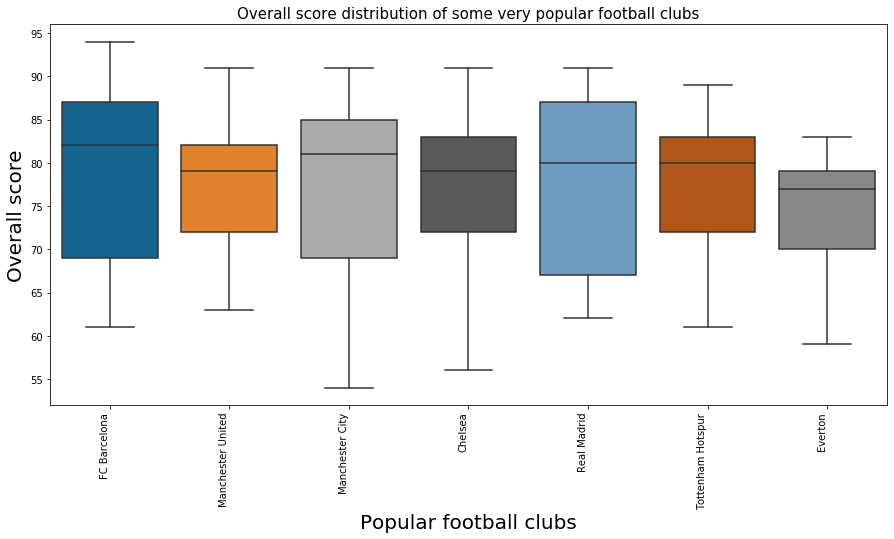

In [382]:
# Whats the median, 25th and 75th percentile of overall scores for some of the popular football clubs?
# Let's create a boxplot to visualize this data...
popular_clubs = ['FC Barcelona', 'Manchester United', 'Manchester City', 'Chelsea', 'Real Madrid', 'Tottenham Hotspur','Everton']

# Select only the rows which belong to popular clubs(also select only two columns to help us in plotting)
df2 = fifa_df.loc[fifa_df.Club.isin(popular_clubs), ['Club','Overall']]
df2

ax = sns.boxplot(x='Club', y='Overall', data=df2)
make_sns_plot_viewable(ax, 15, 7, xlabel="Popular football clubs", ylabel="Overall score", title="Overall score distribution of some very popular football clubs")
plt.xticks(rotation = 90)


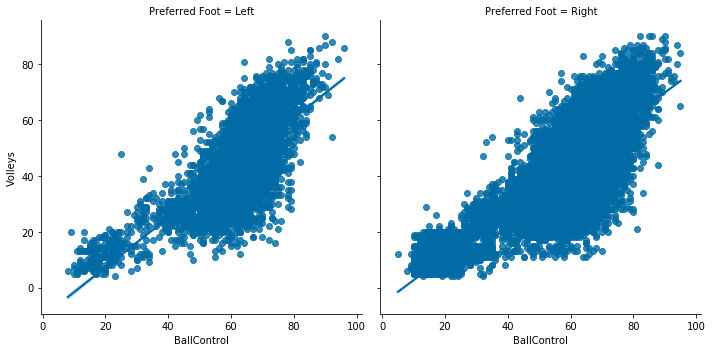

In [388]:
# Check if there is any relation between Volleys and BallControl of left vs right foot players
sns.lmplot(y='Volleys', x='BallControl', col='Preferred Foot', data=fifa_df)

In [410]:
# Get top 10 clubs with players of maximum nationalities playing in them
top_10_clubs_max_nations = fifa_df.groupby('Club').Nationality.nunique().sort_values(ascending=False).head(10)


Club
No Club                   28
Brighton & Hove Albion    21
Fulham                    19
Udinese                   18
Napoli                    18
Empoli                    18
Eintracht Frankfurt       18
West Ham United           18
AS Monaco                 18
Lazio                     18
Name: Nationality, dtype: int64

In [450]:
# Who is the best player in every category?
def best_player_in(category):
    return fifa_df.loc[fifa_df[category].idxmax(), 'Name']

categories = ['Potential', 'Overall', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
best_players = []
for cat in categories:
    player = best_player_in(cat)
    best_players.append(player)
    print("Best player according to {}: {} ".format(cat, player))

Best player according to Potential: K. Mbappé 
Best player according to Overall: L. Messi 
Best player according to Crossing: K. De Bruyne 
Best player according to Finishing: L. Messi 
Best player according to HeadingAccuracy: Naldo 
Best player according to ShortPassing: L. Modrić 
Best player according to Volleys: E. Cavani 
Best player according to Dribbling: L. Messi 
Best player according to Curve: Quaresma 
Best player according to FKAccuracy: L. Messi 
Best player according to LongPassing: T. Kroos 
Best player according to BallControl: L. Messi 
Best player according to Acceleration: Douglas Costa 
Best player according to SprintSpeed: K. Mbappé 
Best player according to Agility: Neymar Jr 
Best player according to Reactions: Cristiano Ronaldo 
Best player according to Balance: Bernard 
Best player according to ShotPower: Cristiano Ronaldo 
Best player according to Jumping: Cristiano Ronaldo 
Best player according to Stamina: N. Kanté 
Best player according to Strength: A. Aki

In [445]:
fifa_df['Club'].unique()

array(['FC Barcelona', 'Juventus', 'Paris Saint-Germain',
       'Manchester United', 'Manchester City', 'Chelsea', 'Real Madrid',
       'Atlético Madrid', 'FC Bayern München', 'Tottenham Hotspur',
       'Liverpool', 'Napoli', 'Arsenal', 'Milan', 'Inter', 'Lazio',
       'Borussia Dortmund', 'Vissel Kobe', 'Olympique Lyonnais', 'Roma',
       'Valencia CF', 'Guangzhou Evergrande Taobao FC', 'FC Porto',
       'FC Schalke 04', 'Beşiktaş JK', 'LA Galaxy', 'Sporting CP',
       'Real Betis', 'Olympique de Marseille', 'RC Celta',
       'Bayer 04 Leverkusen', 'Real Sociedad', 'Villarreal CF',
       'Sevilla FC', 'SL Benfica', 'AS Saint-Étienne', 'AS Monaco',
       'Leicester City', 'Atalanta', 'Grêmio', 'Atlético Mineiro',
       'RB Leipzig', 'Ajax', 'Dalian YiFang FC', 'Everton',
       'West Ham United', '1. FC Köln', 'TSG 1899 Hoffenheim',
       'Shanghai SIPG FC', 'OGC Nice', 'Al Nassr',
       'Wolverhampton Wanderers', 'Borussia Mönchengladbach',
       'Hertha BSC', 'SV Werder

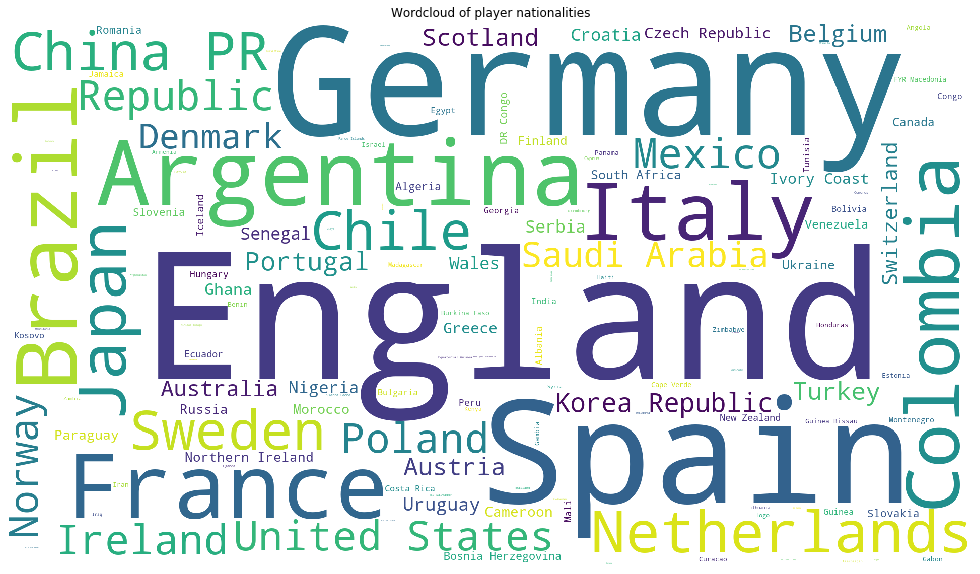

In [446]:
def create_wordcloud(corpus, title):
    plt.subplots(figsize=(20,10))
    wc = wordcloud.WordCloud(background_color='white', width=1920, height=1080).generate(corpus)
    plt.imshow(wc)
    plt.title(title)
    plt.axis('off')


corpus = ",".join(fifa_df.Nationality)
title = "Wordcloud of player nationalities"
create_wordcloud(corpus, title)

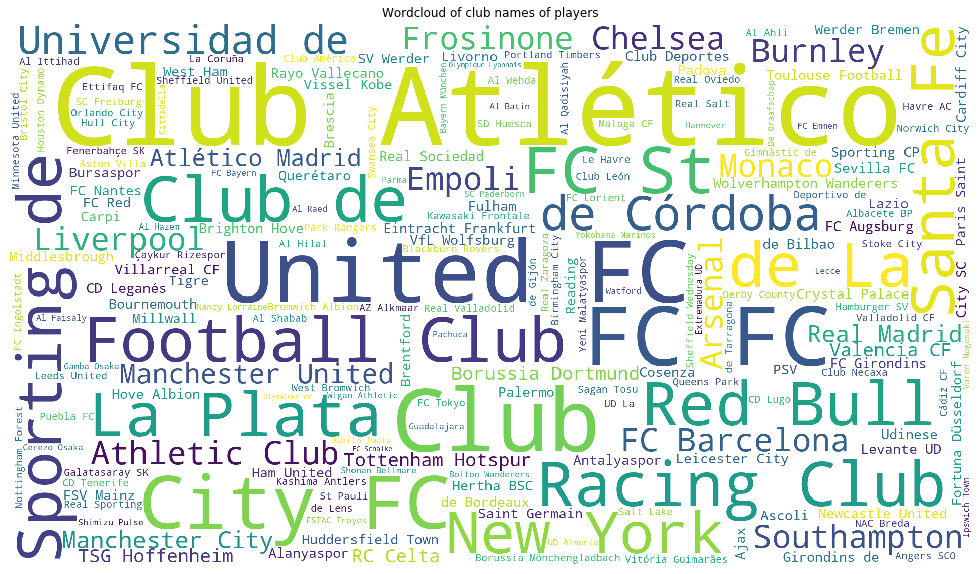

In [447]:
# With NaN values present in the Club col, wordcloud generation fails
corpus = ",".join(fifa_df.Club)
title = "Wordcloud of club names of players"
create_wordcloud(corpus, title)
# Conclusion: Not very informative one because names of clubs of len>2 are not shown properly. Eg:
# "City FC" can either be 'Melbourne City FC' or 'New York City FC'. Which one is it actually?

In [449]:
# Checking some club names(with 'City FC' and 'United FC' in their names) and their frequencies
fifa_df.Club.value_counts().loc[['New York City FC', 'Melbourne City FC', 'Minnesota United FC', 'Jeju United FC', 'Incheon United FC']]

New York City FC       26
Melbourne City FC      25
Minnesota United FC    30
Jeju United FC         28
Incheon United FC      28
Name: Club, dtype: int64

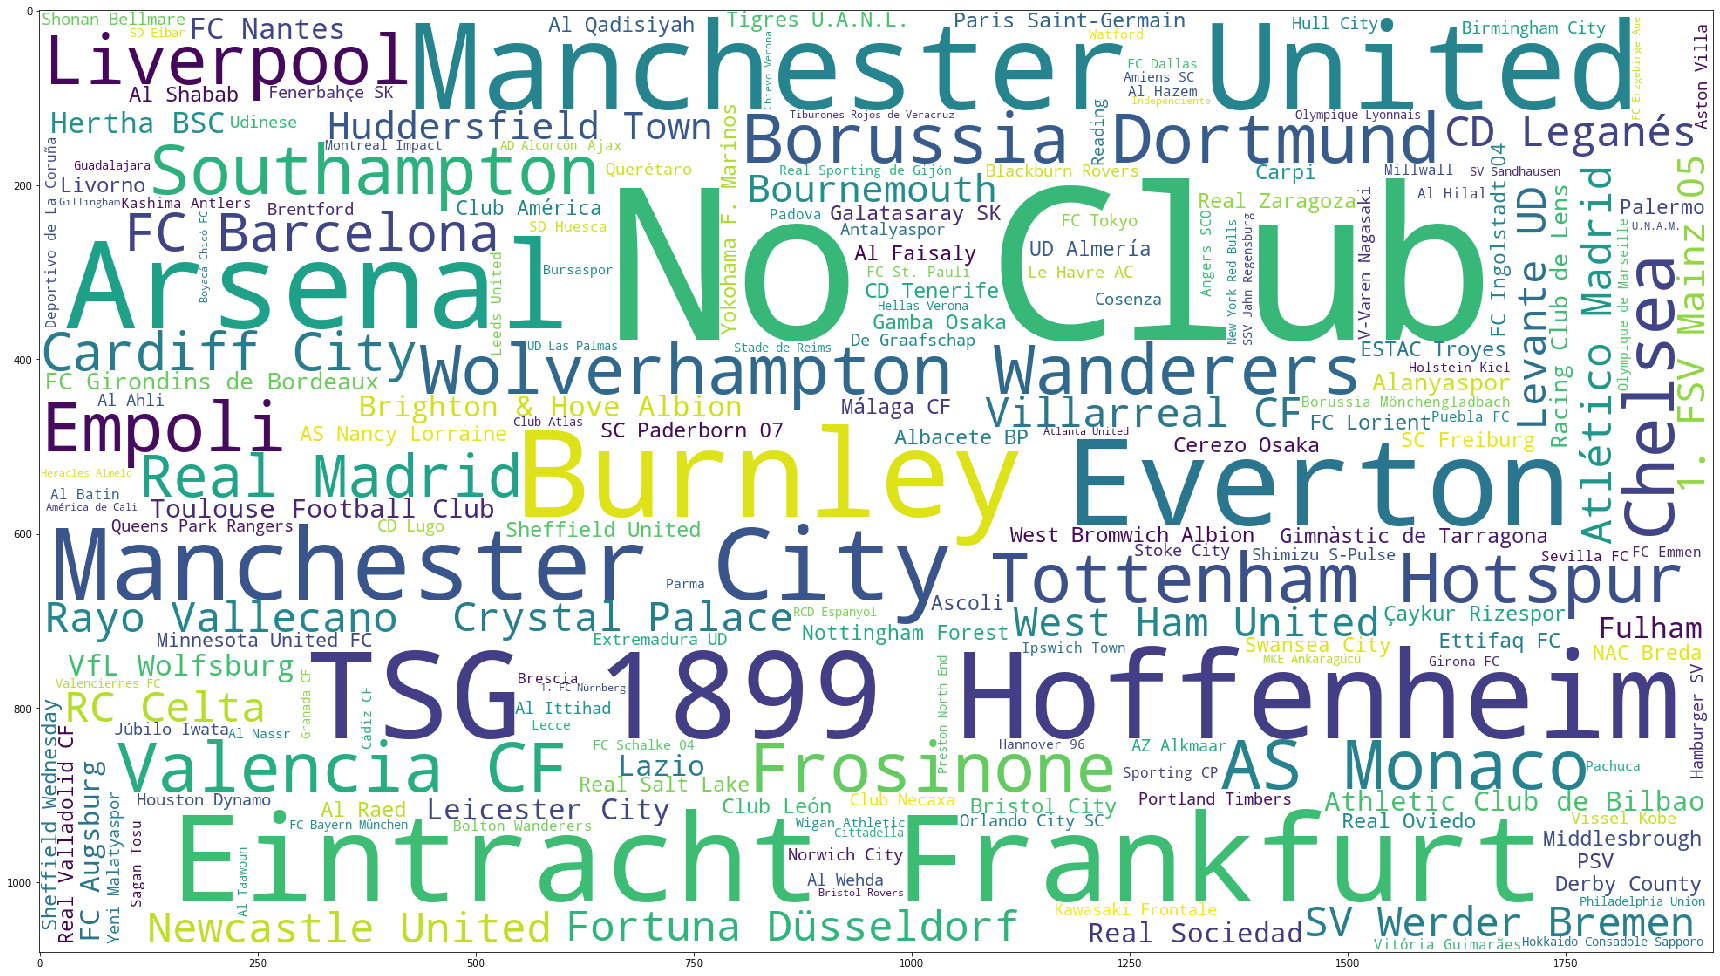

In [448]:
x = dict([tuple(x) for x in fifa_df.Club.value_counts().reset_index().values]) # dict of frequencies is needed by generate_from_frequencies() function 
wc = wordcloud.WordCloud(background_color='white', width=1920, height=1080).generate_from_frequencies(x)
plt.subplots(figsize=(30,20))
plt.imshow(wc)
# Conclusion: Now it shows the full names of clubs with their correct sizes as per frequencies. Most players 
# don't play for any club.

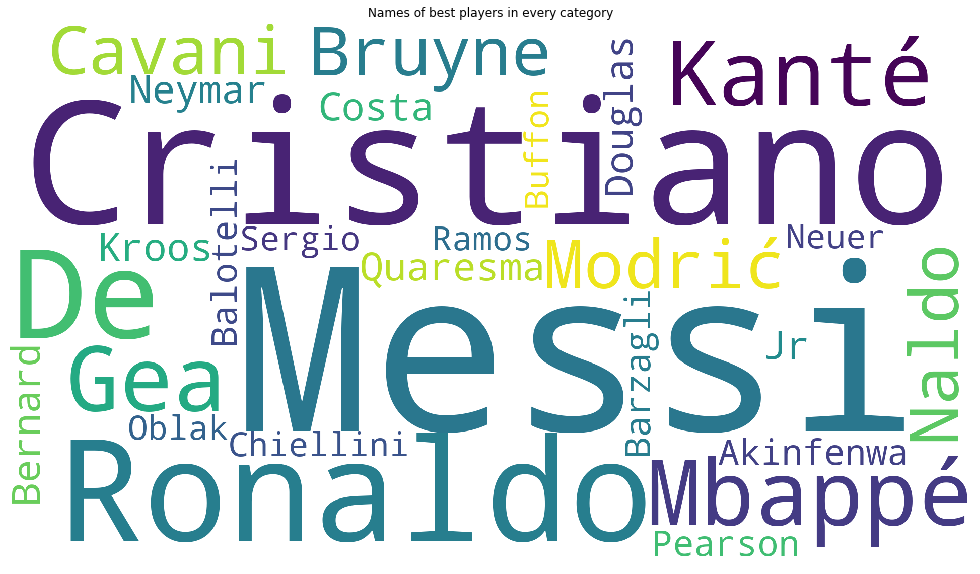

In [458]:
corpus = ",".join(p for p in best_players)
create_wordcloud(corpus, "Names of best players in every category")


In [466]:
# Create a new players dataset
players = fifa_df[['Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo', 'Defending', 'Passing', 'Mobility', 'Mental', 'Power', 'Rating',
       'Shooting', 'General']]
players

,Name,Age,Photo,Nationality,Flag,Club,Club Logo,Defending,Passing,Mobility,Mental,Power,Rating,Shooting,General
0,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,29,87,91,71,74,94,88,89
1,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,27,81,91,73,83,94,88,88
2,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,28,80,94,72,69,92,84,85
3,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,16,39,66,43,54,92,21,26
4,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,59,92,81,81,76,92,85,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,45,43,55,46,54,56,37,39
18203,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,Trelleborgs FF,https://cdn.sofifa.org/teams/2/light/703.png,19,30,40,37,52,55,39,41
18204,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,Cambridge United,https://cdn.sofifa.org/teams/2/light/1944.png,19,30,59,36,51,57,42,43
18205,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,Tranmere Rovers,https://cdn.sofifa.org/teams/2/light/15048.png,24,39,48,38,50,56,45,44


In [684]:
import requests
import matplotlib.image as mplimg
from math import pi
from random import randint

# Draw polar plot of a player with imp details(given his name)
def draw_polar(name):
    player = players[players.Name == name]
    if len(player):       
        flag_img = mplimg.imread('img_flag.jpg')
        plt.figure(figsize=(15,8))
        cols_to_plot = ['Defending', 'Passing', 'Mobility', 'Mental', 'Power', 'Rating','Shooting', 'General']
        N = len(cols_to_plot)
        angles = [2*pi*n/N for n in range(N)]
        angles += angles[:1] # TODO: remove this line and test...append the first values in list to the end(not sure why this is needed???)
        values_to_plot = player.loc[:,cols_to_plot].values.flatten().tolist()
        values_to_plot += values_to_plot[:1]
        
        # Plot polar graph
        ax = plt.subplot(111, projection='polar')
        ax.set_theta_offset(pi/2)
        ax.set_theta_direction(1) # theta increases in anti-clockwise direction
        plt.xticks(angles[:-1], cols_to_plot, color='black')
        plt.yticks([25,50,75,100], ["25","50","75","100"], color='black')
        plt.ylim(0, 100)
        ax.plot(angles, values_to_plot)
        ax.fill(angles, values_to_plot, color='brown', alpha=0.9)
        
        # add another layer and display player image
        # Add an axes at position rect [left, bottom, width, height] where 
        # all quantities are in fractions of figure width and height.
        axes_coords = [0,0,1,1] 
        # Lower zorder values are drawn first(basically creates layering of data to be displayed)
        new_axes = plt.gcf().add_axes(axes_coords, zorder=-1) 
        new_axes.imshow(flag_img)
        new_axes.axis('off')
        
        # Fill other details about the player
        # xy param doesn't seem to be doing anything here..but still mandatory param
        ax.annotate("Nationality: " + player['Nationality'][0], xy=(100,100), xytext=(98, 138),
                   fontsize=12, bbox={'facecolor': 'white', 'pad': 7})
        
    else:
        print("{} does not exist in dataset".format(name))

# Links dont work anymore
def download_save_image(url, img_name):
    pic = requests.get(url).content
    with open(img_name, 'wb') as f:
        f.write(pic)

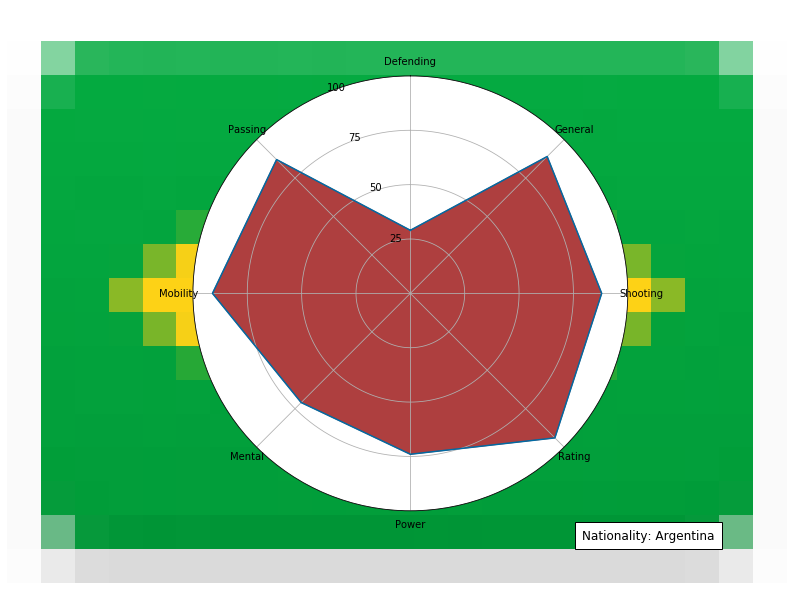

In [685]:
draw_polar('L. Messi')

## Using my fifa-scraper to get working links of photo, flag and club logos

In [725]:
working_df_1 = pd.read_csv("/Users/niteshsinha/Documents/Personal/TechNibbana/fifa-scraper/working-links.csv", index_col=0)
working_df_1

,Name,Photo,Flag,Club Logo
0,Ansu Fati,https://cdn.sofifa.com/players/253/004/20_60.png,https://cdn.sofifa.com/flags/es.png,https://cdn.sofifa.com/teams/241/light_30.png
1,A. Lewis,https://cdn.sofifa.com/players/243/056/20_60.png,https://cdn.sofifa.com/flags/gb-eng.png,https://cdn.sofifa.com/teams/9/light_30.png
2,Fábio Silva,https://cdn.sofifa.com/players/252/037/20_60.png,https://cdn.sofifa.com/flags/pt.png,https://cdn.sofifa.com/teams/236/light_30.png
3,O. Etebo,https://cdn.sofifa.com/players/234/457/20_60.png,https://cdn.sofifa.com/flags/ng.png,https://cdn.sofifa.com/teams/1860/light_30.png
4,A. Rüdiger,https://cdn.sofifa.com/players/205/452/20_60.png,https://cdn.sofifa.com/flags/de.png,https://cdn.sofifa.com/teams/5/light_30.png
...,...,...,...,...
5006,Y. Asad,https://cdn.sofifa.com/players/222/644/20_60.png,https://cdn.sofifa.com/flags/ar.png,https://cdn.sofifa.com/teams/688/light_30.png
5007,Y. Leiva,https://cdn.sofifa.com/players/222/497/20_60.png,https://cdn.sofifa.com/flags/cl.png,https://cdn.sofifa.com/teams/101121/light_30.png
5008,Jiang Zhipeng,https://cdn.sofifa.com/players/222/273/20_60.png,https://cdn.sofifa.com/flags/cn.png,https://cdn.sofifa.com/teams/112978/light_30.png
5009,A. González,https://cdn.sofifa.com/players/226/086/20_60.png,https://cdn.sofifa.com/flags/ar.png,https://cdn.sofifa.com/teams/101083/light_30.png


In [733]:
working_df_2 = pd.read_csv("/Users/niteshsinha/Documents/Personal/TechNibbana/fifa-scraper/working-links-1.csv", index_col=0)
working_df_2

,Name,Photo,Flag,Club Logo
0,Adilson Edrada,https://cdn.sofifa.com/players/230/475/20_60.png,https://cdn.sofifa.com/flags/br.png,https://cdn.sofifa.com/teams/1053/light_30.png
1,A. De Sart,https://cdn.sofifa.com/players/228/804/20_60.png,https://cdn.sofifa.com/flags/be.png,https://cdn.sofifa.com/teams/230/light_30.png
2,A. Hanche-Olsen,https://cdn.sofifa.com/players/228/518/20_60.png,https://cdn.sofifa.com/flags/no.png,https://cdn.sofifa.com/teams/917/light_30.png
3,A. Hunter,https://cdn.sofifa.com/players/226/679/20_60.png,https://cdn.sofifa.com/flags/gb-eng.png,https://cdn.sofifa.com/teams/113926/light_30.png
4,A. Batalla,https://cdn.sofifa.com/players/227/186/20_60.png,https://cdn.sofifa.com/flags/ar.png,https://cdn.sofifa.com/teams/112116/light_30.png
...,...,...,...,...
14811,Rubén Castro,https://cdn.sofifa.com/players/115/909/20_60.png,https://cdn.sofifa.com/flags/es.png,https://cdn.sofifa.com/teams/472/light_30.png
14812,10 S. Wilson,https://cdn.sofifa.com/players/116/088/10_60.png,https://cdn.sofifa.com/flags/gb-sct.png,https://cdn.sofifa.com/teams/112079/light_30.png
14813,17 Pelegrín,https://cdn.sofifa.com/players/110/020/17_60.png,https://cdn.sofifa.com/flags/es.png,https://cdn.sofifa.com/teams/468/light_30.png
14814,08 S. Kühne,https://cdn.sofifa.com/players/127/714/08_60.png,https://cdn.sofifa.com/flags/de.png,https://cdn.sofifa.com/teams/110591/light_30.png


In [812]:
final_working_df = pd.concat([working_df_1,working_df_2], axis=0)
final_working_df

,Name,Photo,Flag,Club Logo
0,Ansu Fati,https://cdn.sofifa.com/players/253/004/20_60.png,https://cdn.sofifa.com/flags/es.png,https://cdn.sofifa.com/teams/241/light_30.png
1,A. Lewis,https://cdn.sofifa.com/players/243/056/20_60.png,https://cdn.sofifa.com/flags/gb-eng.png,https://cdn.sofifa.com/teams/9/light_30.png
2,Fábio Silva,https://cdn.sofifa.com/players/252/037/20_60.png,https://cdn.sofifa.com/flags/pt.png,https://cdn.sofifa.com/teams/236/light_30.png
3,O. Etebo,https://cdn.sofifa.com/players/234/457/20_60.png,https://cdn.sofifa.com/flags/ng.png,https://cdn.sofifa.com/teams/1860/light_30.png
4,A. Rüdiger,https://cdn.sofifa.com/players/205/452/20_60.png,https://cdn.sofifa.com/flags/de.png,https://cdn.sofifa.com/teams/5/light_30.png
...,...,...,...,...
14811,Rubén Castro,https://cdn.sofifa.com/players/115/909/20_60.png,https://cdn.sofifa.com/flags/es.png,https://cdn.sofifa.com/teams/472/light_30.png
14812,10 S. Wilson,https://cdn.sofifa.com/players/116/088/10_60.png,https://cdn.sofifa.com/flags/gb-sct.png,https://cdn.sofifa.com/teams/112079/light_30.png
14813,17 Pelegrín,https://cdn.sofifa.com/players/110/020/17_60.png,https://cdn.sofifa.com/flags/es.png,https://cdn.sofifa.com/teams/468/light_30.png
14814,08 S. Kühne,https://cdn.sofifa.com/players/127/714/08_60.png,https://cdn.sofifa.com/flags/de.png,https://cdn.sofifa.com/teams/110591/light_30.png


In [813]:
import re
pattern = re.compile(r"\d+ ")
def remove_age(df):
    name = df['Name'].replace(u'\xa0', u' ') # \xa0 is a non breaking space in Latin 1
    return pattern.sub("", name).strip()
    
final_working_df['Name'] =final_working_df.apply(remove_age, axis=1)
final_working_df

,Name,Photo,Flag,Club Logo
0,Ansu Fati,https://cdn.sofifa.com/players/253/004/20_60.png,https://cdn.sofifa.com/flags/es.png,https://cdn.sofifa.com/teams/241/light_30.png
1,A. Lewis,https://cdn.sofifa.com/players/243/056/20_60.png,https://cdn.sofifa.com/flags/gb-eng.png,https://cdn.sofifa.com/teams/9/light_30.png
2,Fábio Silva,https://cdn.sofifa.com/players/252/037/20_60.png,https://cdn.sofifa.com/flags/pt.png,https://cdn.sofifa.com/teams/236/light_30.png
3,O. Etebo,https://cdn.sofifa.com/players/234/457/20_60.png,https://cdn.sofifa.com/flags/ng.png,https://cdn.sofifa.com/teams/1860/light_30.png
4,A. Rüdiger,https://cdn.sofifa.com/players/205/452/20_60.png,https://cdn.sofifa.com/flags/de.png,https://cdn.sofifa.com/teams/5/light_30.png
...,...,...,...,...
14811,Rubén Castro,https://cdn.sofifa.com/players/115/909/20_60.png,https://cdn.sofifa.com/flags/es.png,https://cdn.sofifa.com/teams/472/light_30.png
14812,S. Wilson,https://cdn.sofifa.com/players/116/088/10_60.png,https://cdn.sofifa.com/flags/gb-sct.png,https://cdn.sofifa.com/teams/112079/light_30.png
14813,Pelegrín,https://cdn.sofifa.com/players/110/020/17_60.png,https://cdn.sofifa.com/flags/es.png,https://cdn.sofifa.com/teams/468/light_30.png
14814,S. Kühne,https://cdn.sofifa.com/players/127/714/08_60.png,https://cdn.sofifa.com/flags/de.png,https://cdn.sofifa.com/teams/110591/light_30.png


In [814]:
final_working_df.drop_duplicates(inplace=True)
final_working_df.shape

(18332, 4)

In [847]:
# Check if there are >1 row in fifa_df which are duplicates(based on 'Name')
fifa_df[fifa_df.duplicated(subset=['Name'])]
# Conclusion: Yes there are 1013 players whose names are same??

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,GKReflexes,Release Clause,Defending,Passing,Mobility,Mental,Power,Rating,Shooting,General
516,180334,Marcelo,31,https://cdn.sofifa.org/players/4/19/180334.png,Brazil,https://cdn.sofifa.org/flags/54.png,80,80,Olympique Lyonnais,https://cdn.sofifa.org/teams/2/light/66.png,...,14.0,€19M,78,59,57,66,76,80,48,60
540,150418,M. Gómez,32,https://cdn.sofifa.org/players/4/19/150418.png,Germany,https://cdn.sofifa.org/flags/21.png,80,80,VfB Stuttgart,https://cdn.sofifa.org/teams/2/light/36.png,...,14.0,€20.4M,30,60,68,64,68,80,69,73
683,184949,Mariano,32,https://cdn.sofifa.org/players/4/19/184949.png,Brazil,https://cdn.sofifa.org/flags/54.png,79,79,Galatasaray SK,https://cdn.sofifa.org/teams/2/light/325.png,...,13.0,€13.3M,75,78,79,72,76,79,64,74
835,202642,Fernando,26,https://cdn.sofifa.org/players/4/19/202642.png,Brazil,https://cdn.sofifa.org/flags/54.png,78,81,Spartak Moscow,https://cdn.sofifa.org/teams/2/light/100767.png,...,6.0,€23.9M,75,74,73,70,78,80,68,72
901,215051,L. López,28,https://cdn.sofifa.org/players/4/19/215051.png,Argentina,https://cdn.sofifa.org/flags/52.png,77,77,Genoa,https://cdn.sofifa.org/teams/2/light/110556.png,...,13.0,0,76,52,67,62,69,77,48,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18179,246243,J. Williams,17,https://cdn.sofifa.org/players/4/19/246243.png,England,https://cdn.sofifa.org/flags/14.png,48,64,Northampton Town,https://cdn.sofifa.org/teams/2/light/1930.png,...,8.0,€119K,47,28,51,37,61,56,28,32
18188,240927,L. Collins,17,https://cdn.sofifa.org/players/4/19/240927.png,Wales,https://cdn.sofifa.org/flags/50.png,47,62,Newport County,https://cdn.sofifa.org/teams/2/light/112254.png,...,10.0,€143K,37,46,60,42,50,54,37,43
18195,243582,S. Griffin,18,https://cdn.sofifa.org/players/4/19/243582.png,Republic of Ireland,https://cdn.sofifa.org/flags/25.png,47,67,Waterford FC,https://cdn.sofifa.org/teams/2/light/753.png,...,13.0,€153K,43,47,56,43,56,57,36,41
18200,231381,J. Young,18,https://cdn.sofifa.org/players/4/19/231381.png,Scotland,https://cdn.sofifa.org/flags/42.png,47,62,Swindon Town,https://cdn.sofifa.org/teams/2/light/1934.png,...,11.0,€143K,15,33,58,35,55,54,44,40


In [853]:
fifa_df[fifa_df.duplicated()]
# COnclusion: Even though player names are same, they are different players in real.

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,GKReflexes,Release Clause,Defending,Passing,Mobility,Mental,Power,Rating,Shooting,General


In [854]:
fifa_df.join(final_working_df, how='left', on='Name')
# Merge won't work because it uses right DF's index(which is int64).
# Instead if you want to merge based on columns of both dataframes, always use merge() instead of join()

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [826]:
result_df = fifa_df.merge(final_working_df, how='left', left_on='Name', right_on='Name')
# COnclusion: This is not the right result_df since names of >1 player is same. 
# So, we need to join on more columns(in addition to name) so that the combination of all is unique.
# TODO: As next step, lets get the ID of the player as well. Thats unique by itself. We can join only on ID. 